In [1]:
import pandas as pd
import numpy as np
import random

np.random.seed(1)
random.seed(1)
TRAININFO = "/data/HitSongPrediction/train_info.tsv"
TRAINRANK =  "/data/HitSongPrediction/train_rank.csv"
TESTINFO = "/data/HitSongPrediction/test_info.tsv"
SUBMISSION = "/data/HitSongPrediction/submission.csv"

# Prepare data
df_i = pd.read_csv(TRAININFO, delimiter='\t',encoding='utf-8')
df_r = pd.read_csv(TRAINRANK)
df_i_train = df_i.merge(df_r, left_on='ID', right_on='ID')
df_i_train["dataset"] = "train"

df_i_test = pd.read_csv(TESTINFO, delimiter='\t',encoding='utf-8')
df_i_test["label"] = np.nan
df_i_test["dataset"] = "test"

df = pd.concat([df_i_train, df_i_test])
df_track_info = pd.read_csv("../../csv/all_track_info.csv")
df = df.merge(df_track_info, left_on='ID', right_on='ID')
df_audio_features = pd.read_csv("../../csv/all_track_audio_features.csv")
df =df.merge(df_audio_features,left_on="ID",right_on="ID", how="left")

# Sort by ID
df = df.sort_values(by=['ID'])
df= df.reset_index()

# for i,o in df.iterrows():
#     print(o.ID,"------",o.album,"--------", o.album_artist,"------",o.artist_name,"---",o.label)



In [20]:
import re
def get_min_artist_id(s):
    ps = re.split(',|\.',s)
    ps = [int(p) for p in ps]
    return np.min(ps)

def get_max_artist_id(s):
    ps = re.split(',|\.',s)
    ps = [int(p) for p in ps]
    return np.max(ps)

df["artist_id_min"]=  df["artist_id"].apply(lambda x: get_min_artist_id(x))
df["artist_id_min_cat"] = df["artist_id_min"].astype('category')
df["artist_id_min_cat"] =  df["artist_id_min_cat"].cat.codes

df["composers_id_min"]=  df["composers_id"].apply(lambda x: get_min_artist_id(x))
df["composers_id_min_cat"] = df["composers_id_min"].astype('category')
df["composers_id_min_cat"] =  df["composers_id_min_cat"].cat.codes

In [2]:
df["album_right"] = df.release_time.astype("category").cat.codes


3675

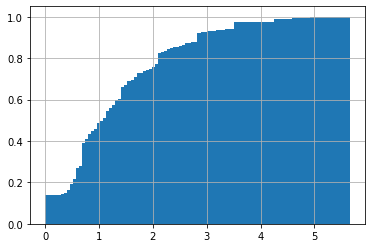

In [32]:
pd.set_option('display.max_rows', 10000)
a=df[df.dataset=="train"].groupby("album_right").agg({"label": ["mean", "count", "std"]})
a[("label", "std")].hist(bins=100, cumulative=True, density=1)
len(a)

label                
                  mean count       std
album_right                           
0             6.000000     2  1.414214
1             2.000000     2  0.000000
2             3.000000     1       NaN
3             1.500000     4  0.577350
4             1.000000     1       NaN
5             3.600000     5  0.894427
6             5.000000     3  1.000000
7             1.000000     1       NaN
8             1.000000     1       NaN
9             3.333333     3  2.516611
10            2.000000     1       NaN
11            2.000000     2  1.414214
12            1.000000     1       NaN
13            3.000000     8  0.000000
14            9.000000     3  0.000000
15            9.000000     1       NaN
16            6.000000     1       NaN
17            3.000000     1       NaN
18            6.000000     1       NaN
19            3.333333     3  0.577350
20            1.000000     1       NaN
21            1.000000     1       NaN
22            1.000000     1       NaN
23            3.250000     4  1.500000
24            2.000000     1       NaN
25            2.615385    13  0.506370
26            3.583333    12  0.668558
27            2.909091    11  0.700649
28            7.000000     5  1.414214
29            4.000000     1       NaN
30            3.000000     1       NaN
31            6.000000     1       NaN
32            4.000000     5  2.345208
33            2.000000     2  1.414214
34            1.000000     8  0.000000
35            4.000000     7  1.000000
37            5.600000     5  1.816590
39            2.000000     1       NaN
40            1.333333     3  0.577350
41            1.500000     2  0.707107
42            7.000000     1       NaN
43            1.000000     1       NaN
44            1.000000     1       NaN
45            3.875000     8  1.125992
46            3.333333     3  1.154701
47            2.000000     1       NaN
48            1.000000     1       NaN
49            3.000000     1       NaN
50            8.000000     6  2.000000
51            5.500000     2  2.121320
52            6.000000     1       NaN
53            3.000000     1       NaN
54            3.000000     1       NaN
55            6.166667     6  1.329160
57            1.000000     1       NaN
58            8.000000     4  0.000000
59            5.400000     5  0.547723
60            1.000000     1       NaN
61            8.000000     1       NaN
62            9.000000     1       NaN
63            8.000000     1       NaN
64            2.000000     1       NaN
66            4.000000     1       NaN
67            8.000000     1       NaN
68            9.000000     1       NaN
69            7.000000     1       NaN
70            1.000000     1       NaN
71            3.000000     7  0.577350
72            1.000000     1       NaN
73            3.000000     1       NaN
74            6.000000     1       NaN
75            2.000000     1       NaN
76            5.800000     5  0.836660
77            2.000000     1       NaN
78            2.000000     1       NaN
79            5.000000     2  2.828427
80            3.000000     1       NaN
81            5.000000     1       NaN
82            4.000000     1       NaN
83            7.200000     5  2.167948
84            3.000000     1       NaN
85            4.000000     1       NaN
86            7.000000     5  2.345208
87            3.000000     1       NaN
88            4.000000     1       NaN
89            3.000000     1       NaN
90            4.000000     1       NaN
91            5.166667     6  1.329160
92            5.000000     1       NaN
93            5.000000     1       NaN
94            5.000000     1       NaN
95            5.000000     1       NaN
96            5.000000     1       NaN
97            5.000000     1       NaN
98            5.500000     2  2.121320
99            6.000000     1       NaN
100           8.571429     7  0.534522
101           7.000000     3  1.000000
102           6.200000     5  0.447214
103           6.285714     7  0.487950


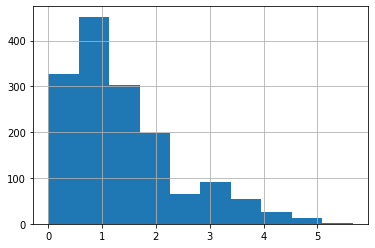

In [61]:
pd.set_option('display.max_rows', 10000)
a=df[df.dataset=="train"].groupby("album_right").agg({"label": ["mean", "count", "std"]})
a[("label", "std")].hist(bins=10)

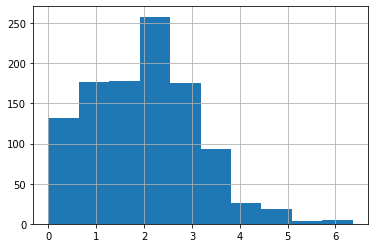

In [70]:
pd.set_option('display.max_rows', 10000)
a=df[df.dataset=="train"].groupby([ "composers_id"]).agg({"label": ["mean", "count", "std"]})
a[("label", "std")].hist(bins=10)
composer_best = a[a[("label", "std")]<1.5].index

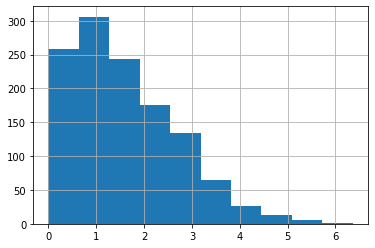

In [71]:
pd.set_option('display.max_rows', 10000)
a=df[df.dataset=="train"].groupby(["artist_id"]).agg({"label": ["mean", "count", "std"]})
a[("label", "std")].hist(bins=10)
artist_best = a[a[("label", "std")]<1.5].index

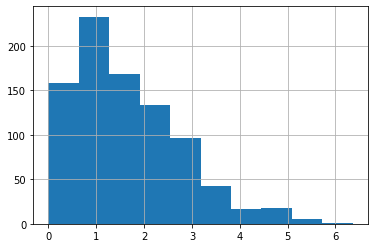

In [79]:
pd.set_option('display.max_rows', 10000)
a=df[df.dataset=="train"].groupby(["album_artist"]).agg({"label": ["mean", "count", "std"]})
a[("label", "std")].hist(bins=10)
artist_best = a[a[("label", "std")]<1.5].index

In [78]:
index1 = df[df.artist_id.isin(artist_best)].index
index2  = df[df.composers_id.isin(composer_best)].index

inter = set(index1) - set(index2)
len(inter)

3411

1     8337
2     1642
3      145
4       43
5       18
6        5
8        4
12       1
11       1
Name: no_artist, dtype: int64


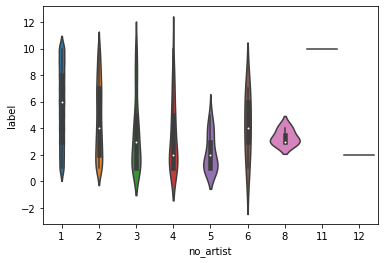

In [51]:
import seaborn as sns
df['no_artist'] = df.artist_name.apply(lambda x: len(x.split(",")))

print(df.no_artist.value_counts())

sns.violinplot(x="no_artist",y="label", data=df[df.dataset=="train"], alpha=0.2)

1    9286
2     817
3      82
4      10
7       1
Name: no_composer, dtype: int64


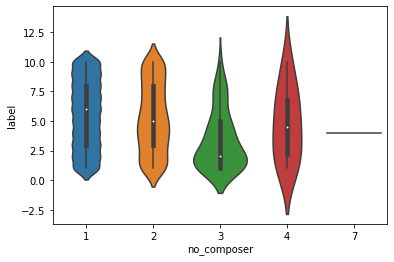

In [53]:
import seaborn as sns
df['no_composer'] = df.composers_name.apply(lambda x: len(x.split(",")))

print(df.no_composer.value_counts())

sns.violinplot(x="no_composer",y="label", data=df[df.dataset=="train"], alpha=0.2)

In [38]:
8337/ (len(df))

0.8176735974892114

4521

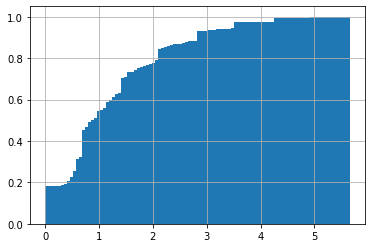

In [33]:
pd.set_option('display.max_rows', 10000)
a=df[df.dataset=="train"].groupby(["album_right","artist_id"]).agg({"label": ["mean", "count", "std"]})
a[("label", "std")].hist(bins=100,cumulative=True, density=1)
len(a)

In [27]:
b = a[a[("label", "std")] <1.5]
len(b)

1066

2391

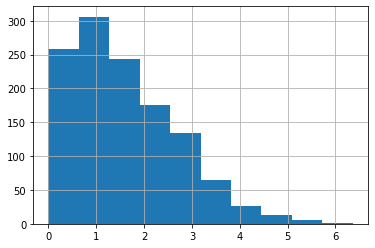

In [19]:
pd.set_option('display.max_rows', 10000)
a=df[df.dataset=="train"].groupby("artist_id").agg({"label": ["mean", "count", "std"]})
a[("label", "std")].hist()
len(a)

4261

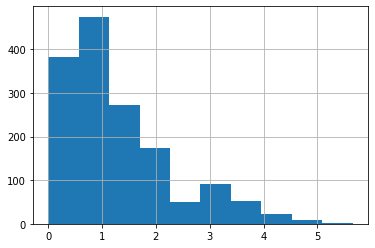

In [21]:
pd.set_option('display.max_rows', 10000)
a=df[df.dataset=="train"].groupby(["album_right","artist_id_min_cat"]).agg({"label": ["mean", "count", "std"]})
a[("label", "std")].hist()
len(a)

4521

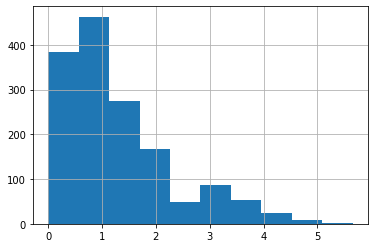

In [17]:
pd.set_option('display.max_rows', 10000)
a=df[df.dataset=="train"].groupby(["album_right","artist_id"]).agg({"label": ["mean", "count", "std"]})
a[("label", "std")].hist()
len(a)

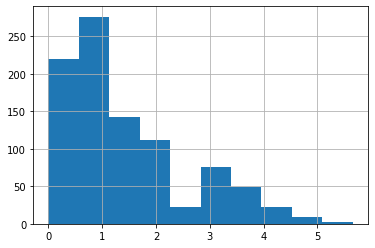

In [16]:
pd.set_option('display.max_rows', 10000)
a=df[df.dataset=="train"].groupby(["artist_id", "album_right", "composers_id"]).agg({"label": ["mean", "count", "std"]})
a[("label", "std")].hist()

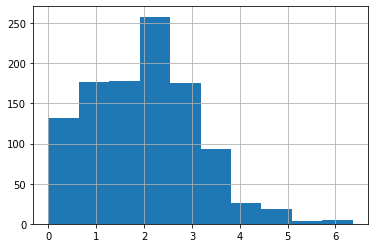

In [12]:
pd.set_option('display.max_rows', 10000)
a=df[df.dataset=="train"].groupby("composers_id").agg({"label": ["mean", "count", "std"]})
a[("label", "std")].hist()